# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [6]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

In [7]:
# Output File (CSV)
output_data_file = "output/cities.csv"
#city_data = pd.read_csv(output_data_file)
# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)
#city_data

## Generate Cities List

In [8]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)



645

In [9]:
cities

['ruatoria',
 'punta arenas',
 'cervo',
 'karratha',
 'eureka',
 'port elizabeth',
 'ushuaia',
 'albany',
 'victoria',
 'padang',
 'cabo san lucas',
 'hobart',
 'lima',
 'port hardy',
 'hoquiam',
 'rikitea',
 'taolanaro',
 'castro',
 'tomatlan',
 'nikolskoye',
 'saldanha',
 'khatanga',
 'vardo',
 'malinyi',
 'barrow',
 'fenyi',
 'champerico',
 'tumannyy',
 'jandaia do sul',
 'hilo',
 'bluff',
 'ambagarh chauki',
 'nouadhibou',
 'ambilobe',
 'minab',
 'dicabisagan',
 'dikson',
 'bambari',
 'mataura',
 'tuktoyaktuk',
 'ribeira grande',
 'nanortalik',
 'bredasdorp',
 'birin',
 'atuona',
 'busselton',
 'letlhakeng',
 'isangel',
 'severomuysk',
 'barentsburg',
 'cayambe',
 'wasilla',
 'pacific grove',
 'mahebourg',
 'ekibastuz',
 'sorvag',
 'new norfolk',
 'baykit',
 'vaitupu',
 'hermanus',
 'kruisfontein',
 'ahuimanu',
 'rocha',
 'khash',
 'conceicao do araguaia',
 'saint george',
 'passo de camaragibe',
 'bethel',
 'meulaboh',
 'baculin',
 'skjervoy',
 'moree',
 'le vauclin',
 'dalby',
 '

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [10]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="
sample_city = ["ostrovnoy","zhuhai","Hars", "New York","new norfolk"]
#cities = []
#response = requests.get(query_url + "Paris").json()


# set up lists to hold reponse info
lat = []
lon = []
max_temp = []
humidity = []
cloud = []
wind_speed = []
city_name = []
country =[]
date =[]

city_id = 1


# Loop through the list of cities and perform a request for data on each
for city in cities:
#for city in sample_city: 
    response = requests.get(query_url + city).json()
    
    try:
        lat.append(response['coord']['lat'])
        lon.append(response["coord"]["lon"])
        max_temp.append(response['main']['temp_max'])
        humidity.append(response["main"]["humidity"])
        cloud.append(response["clouds"]["all"])
        wind_speed.append(response["wind"]["speed"])
        city_name.append(response["name"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        print(f"Processing {city_id} - {city} found")
        print("----------")
        city_id += 1
#response
        #print(json.dumps(response, indent=4, sort_keys=False))
    
    except:
        print(f"{city} not found, skipping")
        print("------------")
        pass
        

ruatoria not found, skipping
------------
Processing 1 - punta arenas found
----------
Processing 2 - cervo found
----------
Processing 3 - karratha found
----------
Processing 4 - eureka found
----------
Processing 5 - port elizabeth found
----------
Processing 6 - ushuaia found
----------
Processing 7 - albany found
----------
Processing 8 - victoria found
----------
Processing 9 - padang found
----------
Processing 10 - cabo san lucas found
----------
Processing 11 - hobart found
----------
Processing 12 - lima found
----------
Processing 13 - port hardy found
----------
Processing 14 - hoquiam found
----------
Processing 15 - rikitea found
----------
taolanaro not found, skipping
------------
Processing 16 - castro found
----------
Processing 17 - tomatlan found
----------
Processing 18 - nikolskoye found
----------
Processing 19 - saldanha found
----------
Processing 20 - khatanga found
----------
Processing 21 - vardo found
----------
Processing 22 - malinyi found
----------
Proc

Processing 178 - airai found
----------
Processing 179 - zhangjiakou found
----------
Processing 180 - shingu found
----------
Processing 181 - dunedin found
----------
Processing 182 - morros found
----------
Processing 183 - batemans bay found
----------
Processing 184 - ulladulla found
----------
Processing 185 - langham found
----------
dinsor not found, skipping
------------
Processing 186 - grindavik found
----------
Processing 187 - kibala found
----------
Processing 188 - kangasala found
----------
Processing 189 - clarence town found
----------
Processing 190 - ponta do sol found
----------
Processing 191 - honiara found
----------
Processing 192 - cidreira found
----------
Processing 193 - key west found
----------
longlac not found, skipping
------------
Processing 194 - zhanaozen found
----------
Processing 195 - nokaneng found
----------
Processing 196 - leningradskiy found
----------
Processing 197 - shimoda found
----------
Processing 198 - esperance found
----------
Pro

Processing 352 - sayyan found
----------
Processing 353 - antalaha found
----------
Processing 354 - bonfim found
----------
Processing 355 - naigarhi found
----------
Processing 356 - casper found
----------
Processing 357 - mercedes found
----------
Processing 358 - haines junction found
----------
Processing 359 - dumas found
----------
Processing 360 - sinnamary found
----------
Processing 361 - hofn found
----------
Processing 362 - matata found
----------
Processing 363 - avera found
----------
Processing 364 - tura found
----------
tiruvottiyur not found, skipping
------------
Processing 365 - aklavik found
----------
Processing 366 - nikki found
----------
Processing 367 - doha found
----------
Processing 368 - lai found
----------
Processing 369 - sindhnur found
----------
Processing 370 - tarakan found
----------
Processing 371 - anadyr found
----------
Processing 372 - hobara found
----------
Processing 373 - sept-iles found
----------
Processing 374 - lorengau found
-------

Processing 533 - neath found
----------
Processing 534 - mukhen found
----------
Processing 535 - pandharpur found
----------
Processing 536 - batagay found
----------
Processing 537 - soacha found
----------
Processing 538 - kyzyl found
----------
Processing 539 - palmerston found
----------
Processing 540 - mudhol found
----------
mentok not found, skipping
------------
satitoa not found, skipping
------------
Processing 541 - monrovia found
----------
Processing 542 - chimoio found
----------
Processing 543 - matucana found
----------
Processing 544 - palmas found
----------
Processing 545 - mahibadhoo found
----------
Processing 546 - mackay found
----------
Processing 547 - mount gambier found
----------
Processing 548 - coracora found
----------
Processing 549 - millau found
----------
Processing 550 - thiruvananthapuram found
----------
Processing 551 - hamilton found
----------
Processing 552 - cowra found
----------
Processing 553 - mwinilunga found
----------
Processing 554 -

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [11]:
#api dataframe
city_data = pd.DataFrame({
    "City":city_name,
    "Country":country,
    "Max Temp": max_temp,
    "Date":date,
   "Cloudiness":cloud,
   "Lat":lat,
    "Lng":lon,
    "Wind Speed": wind_speed,
    "Humidity":humidity})

city_data

,City,Country,Max Temp,Date,Cloudiness,Lat,Lng,Wind Speed,Humidity
0,Punta Arenas,CL,48.20,1619396494,75,-53.1500,-70.9167,10.36,87
1,Cervo,ES,55.00,1619396261,100,43.6702,-7.4101,1.01,88
2,Karratha,AU,78.89,1619396262,0,-20.7377,116.8463,9.10,42
3,Eureka,US,55.00,1619396495,93,40.8021,-124.1637,3.00,77
4,Port Elizabeth,ZA,59.00,1619396570,0,-33.9180,25.5701,8.05,88
...,...,...,...,...,...,...,...,...,...
595,Gigmoto,PH,78.48,1619396888,99,13.7796,124.3900,7.09,75
596,Baiyin,CN,39.20,1619396889,75,36.5583,104.2081,2.24,70
597,Kununurra,AU,82.40,1619396299,98,-15.7667,128.7333,12.66,36
598,Arrondissement de Thiers,FR,55.40,1619396889,0,45.8333,3.5000,4.61,47


In [12]:
city_data.to_csv("WeatherPy/WeatherPy.csv",encoding="utf-8",index=False)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [13]:
clean_city_data = city_data.loc[city_data["Humidity"] < 100]
clean_city_data

,City,Country,Max Temp,Date,Cloudiness,Lat,Lng,Wind Speed,Humidity
0,Punta Arenas,CL,48.20,1619396494,75,-53.1500,-70.9167,10.36,87
1,Cervo,ES,55.00,1619396261,100,43.6702,-7.4101,1.01,88
2,Karratha,AU,78.89,1619396262,0,-20.7377,116.8463,9.10,42
3,Eureka,US,55.00,1619396495,93,40.8021,-124.1637,3.00,77
4,Port Elizabeth,ZA,59.00,1619396570,0,-33.9180,25.5701,8.05,88
...,...,...,...,...,...,...,...,...,...
595,Gigmoto,PH,78.48,1619396888,99,13.7796,124.3900,7.09,75
596,Baiyin,CN,39.20,1619396889,75,36.5583,104.2081,2.24,70
597,Kununurra,AU,82.40,1619396299,98,-15.7667,128.7333,12.66,36
598,Arrondissement de Thiers,FR,55.40,1619396889,0,45.8333,3.5000,4.61,47


In [14]:
#  Get the indices of cities that have humidity over 100%.


In [15]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

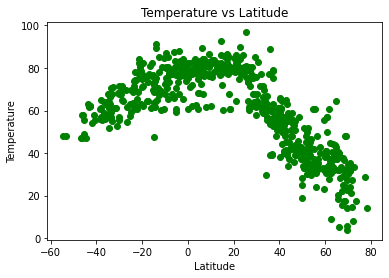

In [16]:
#Temp vs Lat   #change df name

plt.scatter(clean_city_data["Lat"],clean_city_data["Max Temp"], marker="o", color="green")
plt.title("Temperature vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("Temperature")
plt.savefig('WeatherPy/temp_lat.png')
plt.show()


## Latitude vs. Humidity Plot

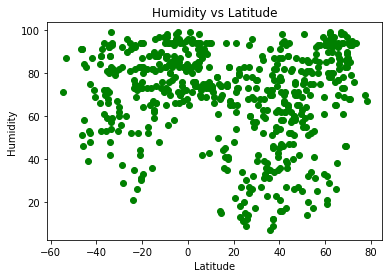

In [17]:
#Humidity vs Lat #change df name

plt.scatter(clean_city_data["Lat"],clean_city_data["Humidity"], marker="o", color="green")
plt.title("Humidity vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.savefig('WeatherPy/hum_lat.png')
plt.show()

## Latitude vs. Cloudiness Plot

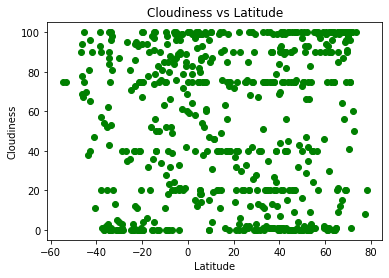

In [18]:
plt.scatter(clean_city_data["Lat"],clean_city_data["Cloudiness"], marker="o", color="green")
plt.title("Cloudiness vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.savefig('WeatherPy/cloud_lat.png')
plt.show()

## Latitude vs. Wind Speed Plot

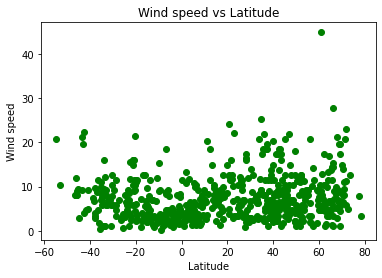

In [19]:
plt.scatter(clean_city_data["Lat"],clean_city_data["Wind Speed"], marker="o", color="green")
plt.title("Wind speed vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("Wind speed")
plt.savefig('WeatherPy/wind_lat.png')
plt.show()

## Linear Regression

In [20]:
north = clean_city_data.loc[(clean_city_data["Lat"] >= 0)]
north
south = clean_city_data.loc[(clean_city_data["Lat"] <= 0)]
south

,City,Country,Max Temp,Date,Cloudiness,Lat,Lng,Wind Speed,Humidity
0,Punta Arenas,CL,48.20,1619396494,75,-53.1500,-70.9167,10.36,87
2,Karratha,AU,78.89,1619396262,0,-20.7377,116.8463,9.10,42
4,Port Elizabeth,ZA,59.00,1619396570,0,-33.9180,25.5701,8.05,88
5,Ushuaia,AR,48.20,1619396436,75,-54.8000,-68.3000,20.71,71
8,Padang,ID,78.33,1619396723,83,-0.9492,100.3543,3.20,83
...,...,...,...,...,...,...,...,...,...
580,Alta Floresta,BR,72.27,1619396884,75,-9.8756,-56.0861,2.68,94
581,Miandrivazo,MG,75.22,1619396884,100,-19.5167,45.4667,2.51,80
583,Labuhan,ID,78.71,1619396679,49,-6.8844,112.2051,8.86,83
593,Senanga,ZM,61.39,1619396888,52,-16.1167,23.2667,5.68,73


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

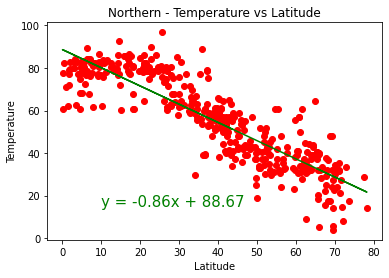

In [21]:
x_values = north["Lat"]
y_values = north["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values,color = "red")
plt.plot(x_values,regress_values,"r-",color = "green")
plt.title("Northern - Temperature vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("Temperature")
plt.annotate(line_eq,(10,15),fontsize=15,color="green")
plt.savefig('WeatherPy/north_temp_lat.png')
plt.show()


####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

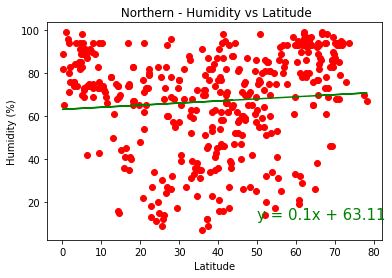

In [22]:

x_values = north["Lat"]
y_values = north["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values,color = "red")
plt.plot(x_values,regress_values,"r-",color = "green")
plt.title(" Northern - Humidity vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.annotate(line_eq,(50,12),fontsize=15,color="green")
plt.savefig('WeatherPy/north_hum_lat.png')
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

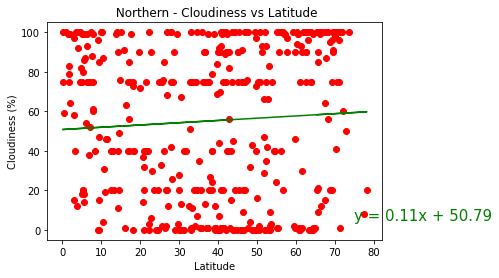

In [23]:
x_values = north["Lat"]
y_values = north["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values,color = "red")
plt.plot(x_values,regress_values,"r-",color = "green")
plt.title(" Northern - Cloudiness vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.annotate(line_eq,(75,5),fontsize=15,color="green")
plt.savefig('WeatherPy/north_cloud_lat.png')
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

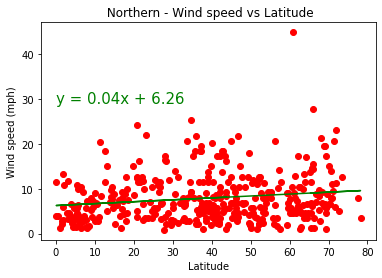

In [24]:
x_values = north["Lat"]
y_values = north["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values,color = "red")
plt.plot(x_values,regress_values,"r-",color = "green")
plt.title(" Northern - Wind speed vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("Wind speed (mph)")
plt.annotate(line_eq,(0,29),fontsize=15,color="green")
plt.savefig('WeatherPy/north_wind_lat.png')
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

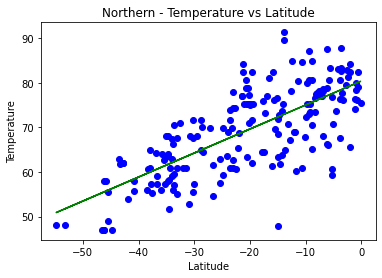

In [25]:
x_values = south["Lat"]
y_values = south["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values,color = "blue")
plt.plot(x_values,regress_values,"r-",color="green")
plt.title("Northern - Temperature vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("Temperature")
plt.annotate(line_eq,(-25,40),fontsize=15,color="green")
plt.savefig('WeatherPy/south_temp_lat.png')
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

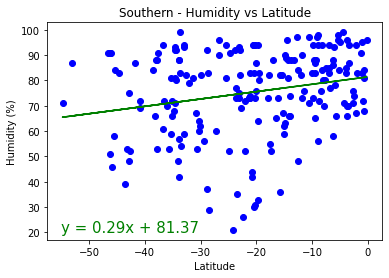

In [26]:
x_values = south["Lat"]
y_values = south["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values,color = "blue")
plt.plot(x_values,regress_values,"r-",color="green")
plt.title("Southern - Humidity vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.annotate(line_eq,(-55,20),fontsize=15,color="green")
plt.savefig('WeatherPy/south_hum_lat.png')
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

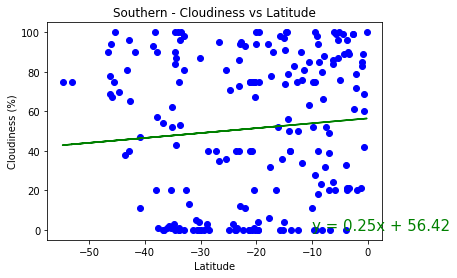

In [27]:
x_values = south["Lat"]
y_values = south["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values,color = "blue")
plt.plot(x_values,regress_values,"r-",color="green")
plt.title("Southern - Cloudiness vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.annotate(line_eq,(-10,0),fontsize=15,color="green")
plt.savefig('WeatherPy/south_cloud_lat.png')
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

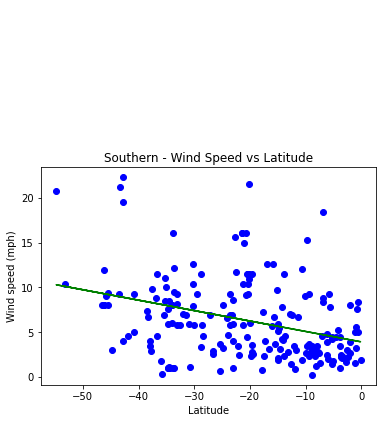

In [28]:
x_values = south["Lat"]
y_values = south["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values,color = "blue")
plt.plot(x_values,regress_values,"r-",color="green")
plt.title("Southern - Wind Speed vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("Wind speed (mph)")
plt.annotate(line_eq,(-30,40),fontsize=15,color="green")
plt.savefig('WeatherPy/south_wind_lat.png')
plt.show()